In [1]:
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.datasets.samples_generator import make_blobs
from scipy.spatial.distance import cdist

/home/hxy/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# read data

In [2]:
x,y=make_blobs(n_samples=100,centers=6,random_state=1234,cluster_std=0.6)

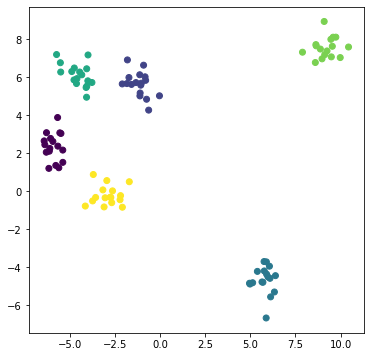

In [3]:
plt.figure(figsize=(6,6))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

# algorithm

In [20]:
class K_Means:
    
    def __init__(self,n_clusters=6,max_iter=300,centroids=[]):
        self.n_clusters=n_clusters
        self.max_iter=max_iter
        self.centroids=np.array(centroids,dtype=np.float)
        
    #model 
    def fit(self, data):
        #if no centroids random choose 
        if self.centroids.shape==(0,):
            self.centroids=data[np.random.randint(0,data.shape[0],self.n_clusters),:]
            
        #start iteration
        for i in range(self.max_iter):
            #calculate distance metrix
            distances=cdist(data,self.centroids)
            
            #sort the distance,choose the neareast one
            c_ind=np.argmin(distances, axis=1)
            
            #update the centorids
            for i in range(self.n_clusters):
                #exclude the point which is not in c_ind
                if i in c_ind:
                    self.centroids[i]=np.mean(data[c_ind==i],axis=0)
            
    #predict function
    def predict(self,samples):
        distances=cdist(samples,self.centroids)
        y_pred=np.argmin(distances,axis=1)
        
        return y_pred
                    

# test algorithm

In [21]:
#define plot function
def plotKmeans(x,y,centroids,subplot,title):
    plt.subplot(subplot)
    plt.scatter(x[:,0],x[:,1],c='r')
    
    #plot centroids
    plt.scatter(centroids[:,0],centroids[:,1],c=np.array(range(6)),s=100)
    plt.title=title
    

[[ 5.76444812 -4.67941789]
 [-2.89174024 -0.22808556]
 [-5.89115978  2.33887408]
 [-4.53406813  6.11523454]
 [-1.15698106  5.63230377]
 [ 9.20551979  7.56124841]]
[1 5]


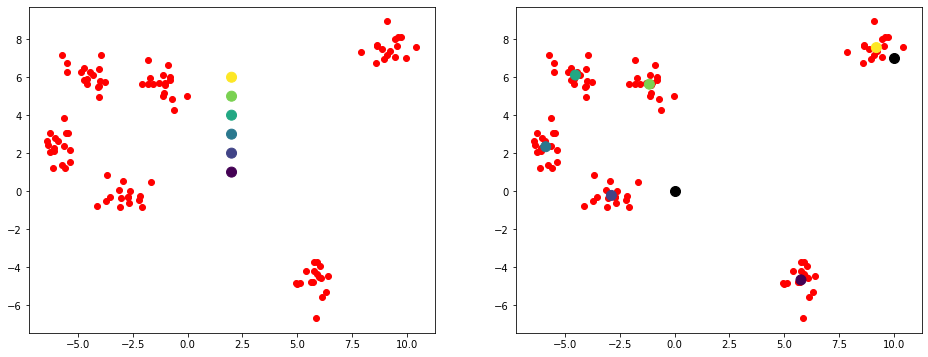

In [22]:
kmeans=K_Means(max_iter=300,centroids=np.array([[2,1],[2,2],[2,3],[2,4],[2,5],[2,6]]))
plt.figure(figsize=(16,6))
plotKmeans(x,y,kmeans.centroids,121,'initial state')

#start cluster
kmeans.fit(x)
plotKmeans(x,y,kmeans.centroids,122,'Final state')


x_new=np.array([[0,0],[10,7]])
y_pred=kmeans.predict(x_new)

print(kmeans.centroids)
print(y_pred)
plt.scatter(x_new[:,0],x_new[:,1],s=100,c='black')

In [18]:
y_pred=kmeans.predict(x_new)
print(y_pred)

11
